# Importing the packages/Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px 
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

# Loading the Players Data

In [8]:
players = pd.read_csv("C:/MBA/Business Analytics/DataSet/IPL Ball-by-Ball 2008-2020.csv")
players.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


# Loading the Matches Data

In [5]:
matches = pd.read_csv("C:/MBA/Business Analytics/DataSet/IPL Matches 2008-2020.csv")
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


# Cleaning the data

In [10]:
matches['season'] = matches['date'].str[:4].astype(int)
matches.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad",inplace=True)
matches.replace(to_replace ="Bangalore", value ="Bengaluru",inplace=True)
matches.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants",inplace=True)
matches.replace(to_replace ="Pune Warriors", value ="Rising Pune Supergiants",inplace=True)
matches.replace(to_replace ="M Chinnaswamy Stadium", value ="M.Chinnaswamy Stadium",inplace=True)
matches.replace(to_replace ="Subrata Roy Sahara Stadium", value ="Maharashtra Cricket Association Stadium",inplace=True)
matches.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals",inplace=True)
matches.replace(to_replace ="Punjab Cricket Association IS Bindra Stadium, Mohali", value ="Punjab Cricket Association Stadium, Mohali",inplace=True)
players.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad",inplace=True)
players.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals",inplace=True)
players.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants",inplace=True)
players.replace(to_replace ="Pune Warriors", value ="Rising Pune Supergiants",inplace=True)


# Merging the data of both data frames

In [11]:
df = matches[['id','season']].merge(players, left_on = 'id', right_on = 'id', how = 'left')
df.head(3)

,id,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


# Toss Decision Count

In [12]:
data = [go.Bar(
    x = matches["toss_decision"].value_counts().index,
    y = matches["toss_decision"].value_counts().values,
    marker = dict(line=dict(color='#000000', width=2))
)]

layout = go.Layout(
   {
      "title":"Most Seeming Decision After Winning Toss",
       "xaxis":dict(title='Decision'),
       "yaxis":dict(title='Number of Matches'),
       "plot_bgcolor":'rgb(245,245,245)'
   }
)
fig = go.Figure(data=data,layout = layout)
iplot(fig)

# Most Wins in IPL History

[120 106  99  95  91  88  86  81  27  13   6]


Text(0.5, 1.0, 'Most Wins in History of IPL')

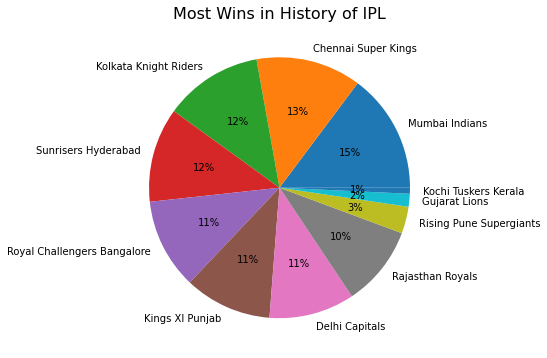

In [13]:
temp = pd.DataFrame({'Winner':matches['winner']})
count_wins = temp.value_counts()
print(count_wins.values)
labels = [x[0] for x in count_wins.keys()]

bar,ax = plt.subplots(figsize=(15,6))
ax = plt.pie(x= count_wins,autopct="%.f%%",labels=labels)
plt.title('Most Wins in History of IPL',fontsize=16)

# Highest scoring batsman

In [14]:
l = [];l1 = [];l2 = []
for player in players.batsman.unique():
    l.append((player,sum(players[players['batsman']==player]['batsman_runs'].values) ))
l.sort(key=lambda x: x[1])
a = l[-10:]
a.reverse()
for i in a:
    l1.append(i[0])
    l2.append(i[1])

fig = go.Figure([go.Bar(x=l1, y= l2,text = l2,textposition='outside',marker=dict(line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Most runs scored in IPL',xaxis=dict(title='Batsmen',tickmode='linear'),yaxis=dict(title='Runs'))
fig.update_layout(layout)
iplot(fig)



# Players who bowled most balls

In [16]:
bowler = players['bowler'].value_counts()
fig = go.Figure([go.Bar(x=bowler.index.tolist()[:11], y= bowler.tolist()[:11],text = bowler.values[:11], textposition='outside',marker=dict(line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Baller who bowled most balls',xaxis=dict(title='Bowler',tickmode='linear'),yaxis=dict(title='Balls Bowled'))
fig.update_layout(layout)
iplot(fig)




# Player with highest catch taking records

In [17]:
catch = players[players['dismissal_kind']=='caught']['fielder'].value_counts()
fig = go.Figure([go.Bar(x=catch.index[:10], y=catch.values[:10],text = catch.values[:10],textposition='outside',marker=dict( line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Most catch taken by a fielder',xaxis=dict(title='Fielders',tickmode='linear'),yaxis=dict(title='No of Catches'))
fig.update_layout(layout)


# Most Man of the match awards

In [29]:
moms = matches['player_of_match'].value_counts()
fig = go.Figure([go.Bar(x=moms.index[:10], y= moms.values[:10],text = moms.values[:10],textposition='outside',marker=dict(line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Most man of the match awards won ',xaxis=dict(title='Player',tickmode='linear'),yaxis=dict(title='Number of Awards'))
fig.update_layout(layout)
iplot(fig)




# Orange cap holders in IPL

In [19]:
orange=matches[['id','season']]
orange=orange.merge(players,left_on='id',right_on='id',how='left')
orange=orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"],keep="first")

data = [go.Bar(x=orange['season'].values,y=orange['batsman_runs'].values,
                name='Total Matches',text=orange['batsman'].values,
                textposition='outside',
                marker=dict(color='rgb(255,140,0)',
                            line=dict(color='rgb(8,48,107)',width=1.5,)),opacity=0.7)]

layout = go.Layout(title='Orange-Cap Holders',xaxis = dict(tickmode='linear',title="IPL Season"),
                   yaxis=dict(title='Runs'), plot_bgcolor='rgb(245,245,245)')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Purple cap holders

In [21]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
purple=players[players["dismissal_kind"].isin(dismissal_kinds)]
purple=purple.merge(matches,left_on='id',right_on='id',how='outer')
purple=purple.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()
purple=purple.sort_values('dismissal_kind',ascending=False)
purple=purple.drop_duplicates('season',keep='first').sort_values(by='season')
purple.rename({'dismissal_kind':'count_wickets'},axis=1,inplace=True)

trace1 = go.Bar(x=purple['season'].values,y=purple['count_wickets'].values,
                name='Total Matches',text=purple['bowler'].values,
                textposition='outside',
                marker=dict(color='rgb(75,0,130)',
                            line=dict(color='#000000',width=1.5,)),
                opacity=0.4)

layout = go.Layout(title='Purple-Cap Holders',xaxis = dict(tickmode='linear',title="IPL Season"),
                   yaxis=dict(title='No of Wickets'), plot_bgcolor='rgb(245,245,245)')

data=[trace1]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Runs Per over by the individual Teams

In [22]:
runs_per_over = players.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=np.sum)
runs_per_over.reset_index(inplace=True)
number_of_over = players.pivot_table(index=['over'],columns='batting_team',aggfunc='size')
number_of_over.reset_index(inplace=True)

a = players.batting_team.unique().tolist();

fig = go.Figure()
layout = go.Layout(
   {
      "title":"Top Most Dismissal Kind",
   }
)

for i in a:
    fig.add_trace(go.Scatter(x=runs_per_over['over'],y = (runs_per_over[i]/number_of_over[i])*6,name=i))
    
iplot(fig)

# Winners of IPL Leagues 

In [24]:
season_winner=matches.drop_duplicates(subset=['season'], keep='last')[['season','winner']].reset_index(drop=True)
season_winner = season_winner['winner'].value_counts()

season_winner = season_winner.to_frame()
season_winner.reset_index(inplace=True)
season_winner.rename(columns={'index':'team'},inplace=True)

trace0 = go.Pie(labels=season_winner['team'], values=season_winner['winner'],
              hoverinfo='label+value+name',name="Winner", marker=dict(line=dict(color='#000000', width=1.5)))

layout=go.Layout(title='Winners of IPL season (2008-2020)')
fig = go.Figure(data=[trace0], layout=layout)
iplot(fig)

# Hosting Cities

In [26]:
city_result = matches[["city", "result_margin"]].groupby(["city"], as_index=False).mean()

stumping = players[players['dismissal_kind']=='stumped']['fielder'].value_counts()

fig = px.bar(city_result, x="city", y="result_margin", template="simple_white", title="Role of Hosting City in IPL Wins")
fig.show()

# Does toss win help you win the match

In [28]:
a = np.equal(matches['toss_winner'],matches['winner']).value_counts()
fig = go.Figure(data=[go.Pie(labels=a.index, values=a.values, hole=.3)])
layout = go.Layout(title = 'Does toss win help you win the match')
fig.update_layout(layout)
fig.update_traces(textinfo='label + value',marker=dict(line=dict(color='#000000', width=2)))
iplot(fig)